In [50]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [51]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r') # Use ZipFile class to create ZipFile object
zip_ref.extractall('/content')
zip_ref.close()

In [53]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization # Import BatchNormalization

model = Sequential() # Create a Sequential model instance

# ... rest of the code
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) # Now BatchNormalization is defined
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# ... rest of the code

In [54]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [55]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout # Import Dropout

# ... rest of the code remains the same

In [57]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.2431 - accuracy: 0.5791 - val_loss: 0.7220 - val_accuracy: 0.5934
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5838 - accuracy: 0.6864 - val_loss: 0.5314 - val_accuracy: 0.7354
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4935 - accuracy: 0.7651 - val_loss: 0.8390 - val_accuracy: 0.7238
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4389 - accuracy: 0.7962 - val_loss: 0.4680 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3656 - accuracy: 0.8391 - val_loss: 0.4722 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3126 - accuracy: 0.8683 - val_loss: 0.4637 - val_accuracy: 0.8288
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2339 - accuracy: 0.9050 - val_loss: 0.6171 - val_ac

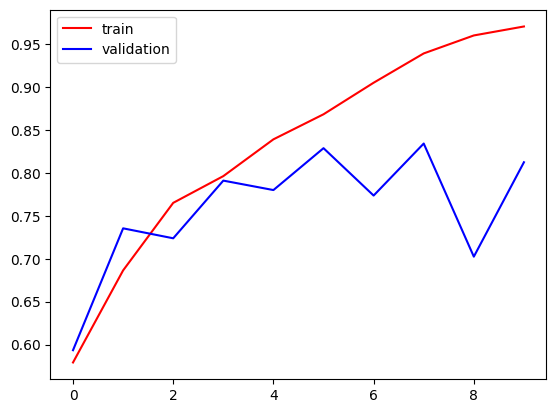

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

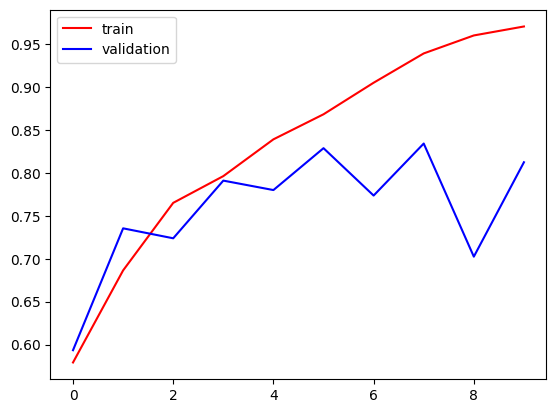

In [61]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

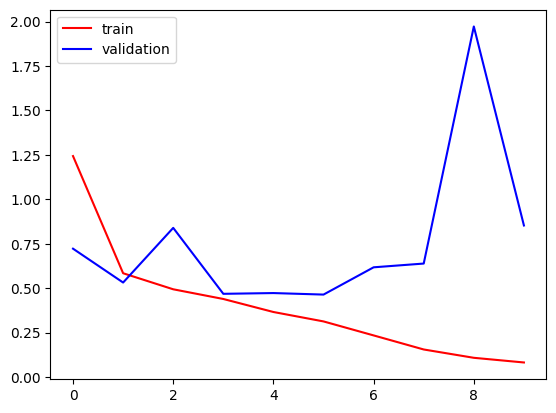

In [62]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [63]:

import cv2

In [64]:
test_img = cv2.imread('/content/cat.83.jpg')

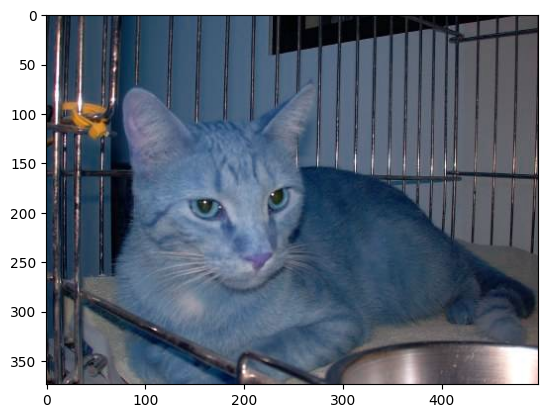

In [65]:
plt.imshow(test_img)

In [66]:
test_img.shape

(374, 498, 3)

In [67]:
test_img = cv2.resize(test_img,(256,256))

In [68]:
test_input = test_img.reshape((1,256,256,3))

In [69]:
model.predict(test_input)

1/1 [==============================] - 0s 97ms/step


array([[0.9235969]], dtype=float32)

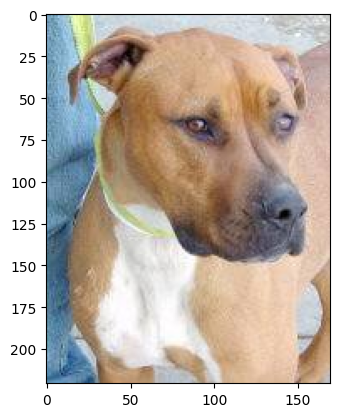

In [70]:
import cv2
import matplotlib.pyplot as plt

# Try to load the image
test_img = cv2.imread('/content/dog.105.jpg')

# Check if the image loaded successfully
if test_img is None:
    print("Failed to load image. Check the file path and ensure the image is not corrupted.")
else:
    # Convert the image from BGR (OpenCV's default) to RGB (Matplotlib's default)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    plt.imshow(test_img)
    plt.show()

In [71]:
test_img.shape

(221, 170, 3)

In [72]:
test_img = cv2.resize(test_img,(256,256))

In [73]:
test_input = test_img.reshape((1,256,256,3))

In [74]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)